## Final Project Submission

Please fill out:
* Student name: Sabina Bains
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: 


In [52]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import statistics
import os
%matplotlib inline

Notes:

imdb variable explanation: https://www.imdb.com/interfaces/

In [53]:
#Viewing and changing filenames for easier file importing

filenames = os.listdir('/Users/sabinabains/Desktop/dsci/Phase1/Phase1Project/dsc-phase-1-project/zippedData')
fullname = []

for file in filenames:
    fullname.append('zippeddata/'+file)
    
for num, name in enumerate(fullname):
    print(num, name)

0 zippeddata/imdb.title.crew.csv.gz
1 zippeddata/tmdb.movies.csv.gz
2 zippeddata/imdb.title.akas.csv.gz
3 zippeddata/imdb.title.ratings.csv.gz
4 zippeddata/imdb.name.basics.csv.gz
5 zippeddata/rt.reviews.tsv.gz
6 zippeddata/imdb.title.basics.csv.gz
7 zippeddata/rt.movie_info.tsv.gz
8 zippeddata/tn.movie_budgets.csv.gz
9 zippeddata/bom.movie_gross.csv.gz
10 zippeddata/imdb.title.principals.csv.gz


In [58]:
ratings = pd.read_csv(fullname[3])

len(ratings)
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [55]:
genres = pd.read_csv(fullname[6])

len(genres)
genres.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [56]:
imdb = pd.merge(ratings, genres, on='tconst', how='outer')
len(imdb)
imdb.duplicated().sum()

0

In [57]:
imdb

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
146139,tt9916538,NaN,NaN,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,NaN,NaN,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,NaN,NaN,6 Gunn,6 Gunn,2017,116.0,NaN


In [6]:
dropcols = ['primary_title','original_title','start_year','runtime_mintues','numvotes']
cols = [col for col in imdb.columns if col not in dropcols]
imdb = imdb[cols]
#eventually drop if num votes < 30(?)
# imdb['numvotes'].describe()
imdb = imdb.dropna()

In [7]:
genre_list = imdb.genres.str.split(',').to_list()
genre_list = list(set(list(chain.from_iterable(genre_list))))

In [8]:
genre_dict={}
for item in genre_list:
    genre_dict[item] = []

In [34]:
imdb1 = imdb['genres'].str.split(',', expand=True).add_prefix('genre').fillna('')
imdb = imdb.join(imdb1)

ValueError: columns overlap but no suffix specified: Index(['genre0', 'genre1', 'genre2'], dtype='object')

In [10]:
# may be promising
for genre in genre_list:
    for index, row in imdb.iterrows():
        if imdb['genre0'][index] == genre:
            genre_dict[row['genre0']].append(row['averagerating'])
        elif imdb['genre1'][index] == genre:
            genre_dict[row['genre1']].append(row['averagerating'])
        elif imdb['genre2'][index] == genre:
            genre_dict[row['genre2']].append(row['averagerating'])

In [11]:
#previewing dictionary
for i in genre_dict:
    print(i, genre_dict[i][0:5])

Horror [5.6, 3.4, 3.6, 2.1, 3.5]
Thriller [6.5, 6.4, 5.5, 7.4, 5.8]
Family [5.4, 6.5, 3.4, 5.5, 4.4]
Crime [7.2, 6.1, 4.5, 6.2, 5.4]
Music [5.2, 7.5, 8.3, 7.0, 7.8]
Action [4.2, 4.2, 7.4, 7.2, 4.5]
Documentary [8.9, 6.2, 4.0, 7.7, 6.7]
Western [4.3, 6.8, 4.0, 6.2, 6.0]
Fantasy [4.2, 6.5, 7.0, 5.6, 5.4]
Mystery [6.5, 4.7, 7.4, 7.0, 2.4]
History [6.2, 6.2, 6.3, 7.3, 6.6]
Adventure [4.2, 4.2, 7.0, 5.0, 7.4]
Romance [8.3, 6.2, 5.8, 6.5, 5.4]
Reality-TV [7.2, 6.8, 3.6, 7.6, 8.8]
War [7.2, 4.0, 6.5, 7.6, 6.7]
Comedy [6.2, 5.1, 5.8, 5.0, 7.2]
Animation [7.0, 5.0, 6.1, 5.5, 6.1]
Sci-Fi [4.2, 5.8, 4.6, 7.0, 4.7]
Biography [7.0, 7.6, 6.6, 8.4, 7.7]
Sport [7.0, 7.6, 6.2, 7.2, 8.3]
Adult [5.9, 2.0]
Musical [7.0, 4.8, 5.8, 4.9, 7.9]
News [7.3, 7.8, 8.5, 8.7, 4.4]
Game-Show [5.6, 9.0]
Short [8.8]
Drama [6.4, 7.0, 6.4, 7.2, 5.8]


In [12]:
newdict = genre_dict

for i in genre_dict:
    newdict[i] = statistics.mean(genre_dict[i])

In [47]:
df = pd.DataFrame(newdict,index=['Average Rating'])
df = df.transpose()
df=df.reset_index()

In [48]:
df1 = df.sort_values('Average Rating', ascending = False).head(10)

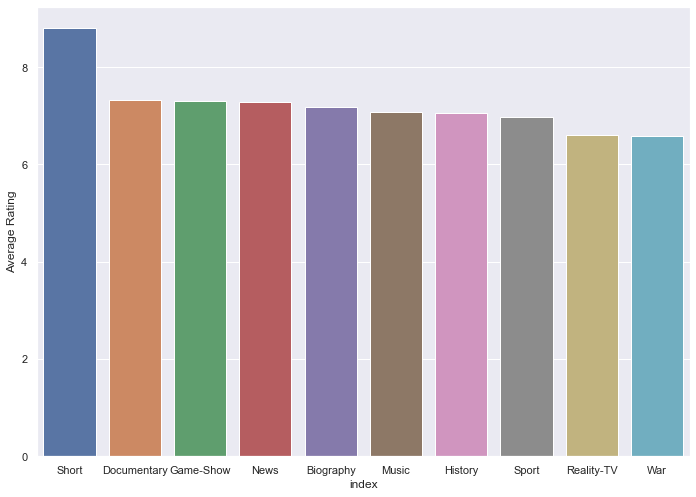

In [51]:
# who v/s fare barplot
sns.barplot(x = 'index',
            y = 'Average Rating',
            data = df1)
 
# Show the plot
sns.set(rc={'figure.figsize':(15,15)})
plt.show()